<h1 align='center'>EE2703 Applied Programming Lab</h1>
<h2 align='center'>Assignment 1</h2>
<h3 align='center'>Jan 26, 2018</h3>
<h3 align='center'>Rajat Vadiraj Dwaraknath EE16B033</h3>

# Part 1
First, numpy and matplotlib are imported inline using pylab.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams['figure.figsize']=12,9 # bigger plots
rcParams['font.size']=15 # bigger text in plots

The given algorithm for computing fibonacci numbers is implemented in C below. The contents of the cell below are written into the file __fib.c__ whenever it is run.

In [3]:
%%writefile fib.c
#include<stdlib.h>
#include<stdio.h>

int main(){
    int n=1, nold=1, new=0,k;
    printf("1 %d\n",n);
    printf("2 %d\n",nold);
    for(k=3;k<=10;k++){
        new = n+nold;
        nold=n;
        n=new;
        printf("%d %d\n",k,new);
    }
}

Overwriting fib.c


Terminal commands are run using the __!__ prefix.

In [4]:
!gcc fib.c -o fib.out

In [5]:
!./fib.out

1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34
10 55


Now, the python implementation:

In [6]:
def fib():
    n=1
    nold=1
    new=0
    print("1 1\n2 1")
    for k in range(3,11,1):
        new=n+nold
        nold=n
        n=new
        print (k,new)

In [7]:
fib()

1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34
10 55


# Part 2
The C implementation of the second question is given below:

In [8]:
%%writefile list.c
#include<stdlib.h>
#include<stdio.h>
#include<math.h>

int main(){
    double n[1000];
    n[0]=0.2;
    double alpha = M_PI, temp;
    int k;
    for(k=1;k<1000;k++){
        temp = (n[k-1]+M_PI)*100;
        n[k] = temp - (long)(temp);
    }
    for(k=0;k<1000;k++){
        printf("%0.4f\n",n[k]);
    }
}

Overwriting list.c


In [9]:
!gcc list.c -o list.out

In [10]:
!./list.out > outC.txt
!head out.txt -n 30 #print only a few lines

0.2000
0.1593
0.0858
0.7394
0.0984
0.9963
0.7896
0.1154
0.6964
0.8029
0.4540
0.5602
0.1808
0.2372
0.8794
0.1018
0.3353
0.6935
0.5089
0.0519
0.3488
0.0363
0.7863
0.7863
0.7863
0.7863
0.7863
0.7863
0.7863
0.7863


The python implementation:

In [11]:
def listProgram():
    import math
    n=[0.2]
    for k in range(1,1000):
        t = (n[k-1]+math.pi)*100
        n.append(t-int(t))
    
    for i in n:
        print("%.4f"%i)

In [12]:
# Context manager to redirect stdout to a file
from contextlib import redirect_stdout

with open("outPy.txt","w") as f:
    with redirect_stdout(f):
        listProgram()
        
!head outPy.txt -n 30 # display few lines of the file

0.2000
0.1593
0.0858
0.7394
0.0984
0.9963
0.7896
0.1154
0.6964
0.8029
0.4540
0.5602
0.1808
0.2372
0.8794
0.1018
0.3353
0.6935
0.5089
0.0519
0.3488
0.0363
0.7863
0.7863
0.7863
0.7863
0.7863
0.7863
0.7863
0.7863


# Part 3
The third part is implemented below:

In [13]:
def freq():
    import re, string
    
    with open('the-hound-of-the-baskervilles.txt', 'r') as f:
        contents = f.read()
    
    d = {}
    words = re.split("[" + string.punctuation + "\\n ]+", contents)
    
    for word in words:
        if len(word.strip())==0:continue
        d[word] = d.get(word,0)+1
    
    # sort based on number of words in descending order
    for key in sorted(d, key = lambda x:-d[x]): 
        print(key,d[key])

In [14]:
with open("wordFreq.txt","w") as f:
    with redirect_stdout(f):
        freq()
!head wordFreq.txt -n 10

the 3146
of 1643
and 1552
I 1501
to 1433
a 1260
that 1091
in 885
it 804
was 793


The word distribution of the most common words is visulaized using a bar plot.

In [15]:
a = np.genfromtxt("wordFreq.txt", 
                  dtype=[("word","<U16"), ("freq",np.uint32)])

In [16]:
# extract the words and frequencies from the file
words,freq=list(zip(*list(a))) 

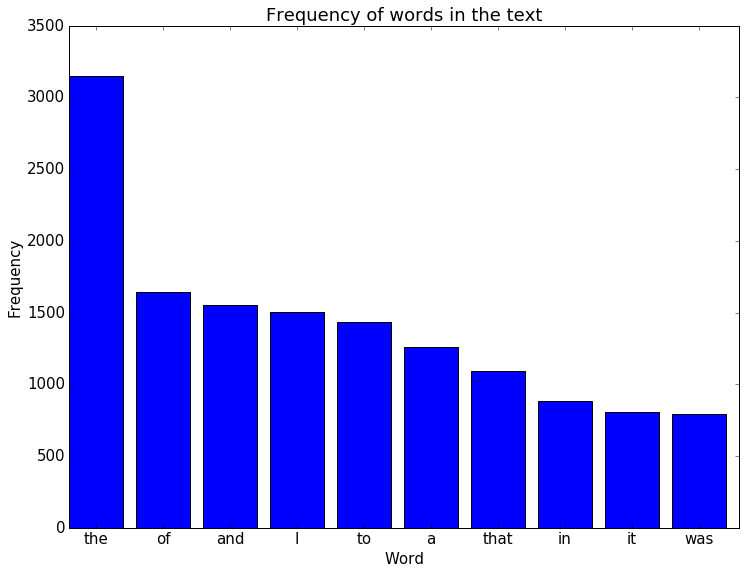

In [17]:
numWords = 10 #how many words to plot
title("Frequency of words in the text")
bar(arange(numWords),freq[:numWords]) # plot the bars
xticks(arange(numWords)+0.4,words[:numWords]) # label the axis
xlabel("Word")
ylabel("Frequency")
show()